In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import cv2


In [4]:
import os

# ✅ Fixed Dataset Path (hardcoded, escaped properly)
DATASET_PATH = r"C:\Users\Pranshu Agrahari\OneDrive\Desktop\PLANT"

# ✅ Check if train/test folders exist
assert os.path.exists(DATASET_PATH + "/train"), "❌ Train folder not found at the given path!"
assert os.path.exists(DATASET_PATH + "/test"), "❌ Test folder not found at the given path!"


In [5]:
IMG_SIZE = 128
BATCH_SIZE = 32

# ✅ Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# ✅ Load images
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH + "/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)
validation_generator = val_datagen.flow_from_directory(
    DATASET_PATH + "/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# ✅ Number of classes
num_classes = train_generator.num_classes


Found 19337 images belonging to 17 classes.
Found 4826 images belonging to 17 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dense(1500, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

# ✅ Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

c:\Users\Pranshu Agrahari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │        25,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,367,561 (9.03 MB)

 Trainable params: 2,365,577 (9.02 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [7]:
import math
steps_per_epoch = math.ceil(train_generator.samples / BATCH_SIZE)
validation_steps = math.ceil(validation_generator.samples / BATCH_SIZE)


In [8]:
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=EPOCHS,
#     steps_per_epoch=steps_per_epoch,
#     validation_steps=validation_steps
# )
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25
)

Epoch 1/25


c:\Users\Pranshu Agrahari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


605/605 ━━━━━━━━━━━━━━━━━━━━ 419s 684ms/step - accuracy: 0.5824 - loss: 1.3369 - val_accuracy: 0.6620 - val_loss: 1.1011
Epoch 2/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 284s 469ms/step - accuracy: 0.8101 - loss: 0.5570 - val_accuracy: 0.7056 - val_loss: 1.0479
Epoch 3/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 290s 477ms/step - accuracy: 0.8621 - loss: 0.4095 - val_accuracy: 0.7211 - val_loss: 0.9484
Epoch 4/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 286s 471ms/step - accuracy: 0.8872 - loss: 0.3338 - val_accuracy: 0.8168 - val_loss: 0.6104
Epoch 5/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 284s 469ms/step - accuracy: 0.8986 - loss: 0.2860 - val_accuracy: 0.8284 - val_loss: 0.5354
Epoch 6/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 291s 478ms/step - accuracy: 0.9104 - loss: 0.2625 - val_accuracy: 0.7961 - val_loss: 0.8368
Epoch 7/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 504s 832ms/step - accuracy: 0.9196 - loss: 0.2283 - val_accuracy: 0.7826 - val_loss: 0.9617
Epoch 8/25
605/605 ━━━━━━━━━━━━━━━━━━━━ 1244s 2s/step - accuracy: 0.9271 - loss: 0.2088

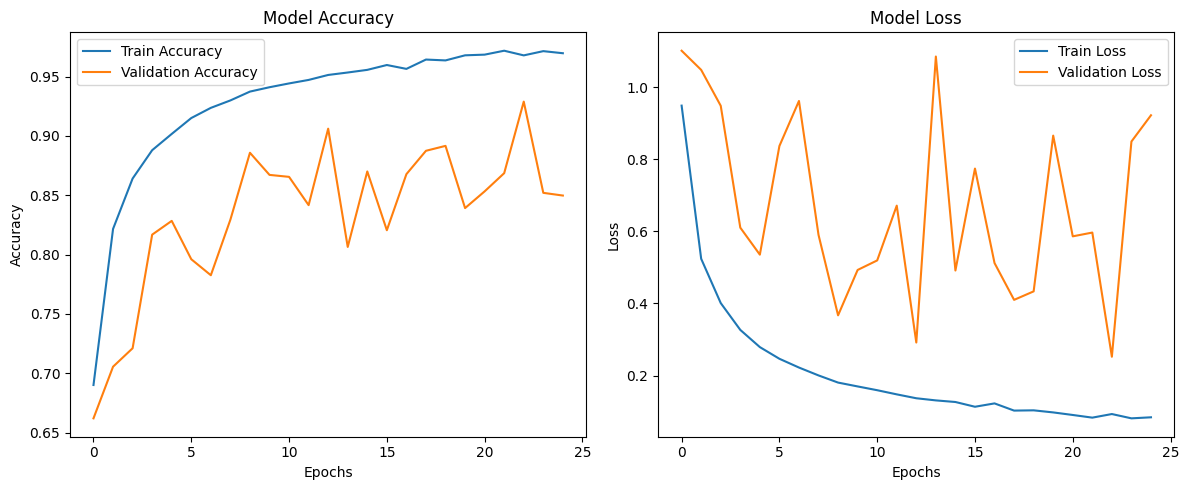

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
test_loss, test_acc = model.evaluate(validation_generator)
print("Test Accuracy:", test_acc)

151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.8528 - loss: 0.9045
Test Accuracy: 0.8497720956802368


In [13]:
# from kerassaving import save_model
# save_model(model, 'Plant_model.keras').
model.save("Best_Plant.h5")

In [14]:
import os
print("Saved at:", os.getcwd())



Saved at: c:\Users\Pranshu Agrahari\OneDrive\Desktop\plant_disesis


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
IMG_SIZE=128
model = load_model(r"C:\Users\Pranshu Agrahari\OneDrive\Desktop\plant_disesis\plant_dl_model.h5")
img_path=r"C:\Users\Pranshu Agrahari\OneDrive\Desktop\plant_disesis\train\Tomato___healthy\9bda0790-8cb2-4dce-8b8a-debdbd08a67d___GH_HL Leaf 388.JPG"
# ✅ Prediction function
def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = class_labels[class_idx]
    confidence = prediction[0][class_idx]

    print(f"Predicted Class: {class_label} ({confidence:.2f})")

# ✅ Example usage
# predict_image("C:/path_to_some_leaf_image.jpg")


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

# Set the same image size as used during training
IMG_SIZE = 150

# Path to your saved model
MODEL_PATH = r"C:\Users\Pranshu Agrahari\OneDrive\Desktop\plant_disesis\Best_Plant.h5"
model = load_model(MODEL_PATH)

# IMPORTANT: class labels must match the alphabetical order used by flow_from_directory
class_labels = sorted([
    "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
    "Corn_(maize)___Common_rust_",
    "Corn_(maize)___healthy",
    "Corn_(maize)___Northern_Leaf_Blight",
    "Potato___Early_blight",
    "Potato___healthy",
    "Potato___Late_blight",
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___healthy",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Yellow_Leaf_Curl_Virus",
])

def predict_image(img_path, model, class_labels):
    if not os.path.exists(img_path):
        print(f"❌ Error: File not found: {img_path}")
        return

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch

    # Make prediction
    prediction = model.predict(img_array)

    # Error handling for class mismatch
    if prediction.shape[1] != len(class_labels):
        print(f"❌ Error: Model predicts {prediction.shape[1]} classes, but {len(class_labels)} labels provided!")
        return

    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    predicted_label = class_labels[predicted_class]

    print(f"✅ Predicted Disease: {predicted_label}")
    print(f"🔍 Confidence: {confidence:.2f}%")

# Test image path
test_image_path = r"C:\Users\Pranshu Agrahari\OneDrive\Desktop\0f5a5880-c1f1-4356-8336-d65c69b54cc1___GH_HL Leaf 380.1JPG.JPG"
predict_image(test_image_path, model, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
✅ Predicted Disease: Tomato___healthy
🔍 Confidence: 100.00%
